In [1]:
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    sns.set_style('white')
    sns.set_context('talk')
    import matplotlib.pyplot as plt
    print('All packages installed successfuly')
except Exception as e:
    print(f'Exception: {e}')

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


All packages installed successfuly


### The cookie problem
* Suppose we have two bowls of cookies, 
    * Bowl_1 contains 30 vanilla and 10 chocolate cookies
    * Bowl_2 contains 20 vanilla and 20 chocolate cookies
* A person chooses one bowl at random, and random picked up cookie turns out to be vanilla cookie.
* What is the probability that chosen Bowl is Bowl_1?

 Assume that there was an equal chance of choosing either bowl and an equal chance of choosing any cookie in the bowl.

In [2]:
priors = [1/2, 1/2]
priors_index = ['Bowl_1', 'Bowl_2']
likelihood = [30/40, 10/20]

In [3]:
def get_posterior(priors, priors_index, likelihood):
    new_df = pd.DataFrame()
    new_df['priors'] = priors
    new_df['likelihood'] = likelihood
    new_df.index = priors_index
    new_df['unnormalized_posterior'] = new_df['priors'] * new_df['likelihood']
    new_df['prob_data'] = [sum(new_df['unnormalized_posterior']) for num in range(len(new_df))]
    new_df['posterior'] = (new_df['priors'] * new_df['likelihood']) / new_df['prob_data']
    return new_df

In [4]:
new_df = get_posterior(priors, priors_index, likelihood)
new_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
Bowl_1,0.5,0.75,0.375,0.625,0.6
Bowl_2,0.5,0.50,0.250,0.625,0.4


### Exercise 1

Suppose we put the first cookie back, stir, draw another cookie from the same bowl, and it's a chocolate cookie. What is the probability we drew both cookies from Bowl 1?

Hint: The prior for the second update is the posterior from the first update.

In [5]:
# first update it is for vanilla
priors = [1/2, 1/2]
priors_index = ['Bowl_1', 'Bowl_2']
likelihood = [30/40, 10/20]
new_df = get_posterior(priors, priors_index, likelihood)
new_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
Bowl_1,0.5,0.75,0.375,0.625,0.6
Bowl_2,0.5,0.50,0.250,0.625,0.4


In [6]:
# second update in which chocolate was found
priors = new_df['posterior']
priors_index = ['Bowl_1', 'Bowl_2']
likelihood = [10/40, 20/40]
updated_df = get_posterior(priors, priors_index, likelihood)
updated_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
Bowl_1,0.6,0.25,0.15,0.35,0.428571
Bowl_2,0.4,0.50,0.20,0.35,0.571429


### 101 Bowls

Suppose instead of 2 bowls there are 101 bowls:

* Bowl 0 contains no vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous problem, there are only two kinds of cookies, vanilla and chocolate. So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla. What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To represent the prior, I'll use a Pandas Series with 101 equally spaced quantities from 0 to 1.


In [17]:
priors_index = list(range(101))
priors = [round(1/len(priors_index), 5) for pri in range(len(priors_index))]
vanilla_likelihood = priors_index
check_df = pd.DataFrame()
check_df['priors'] = priors
check_df['vanilla_likelihood'] = vanilla_likelihood
check_df['chocolate_likelihood'] = 100 - check_df['vanilla_likelihood']
check_df.index = priors_index
check_df

,priors,vanilla_likelihood,chocolate_likelihood
0,0.0099,0,100
1,0.0099,1,99
2,0.0099,2,98
3,0.0099,3,97
4,0.0099,4,96
...,...,...,...
96,0.0099,96,4
97,0.0099,97,3
98,0.0099,98,2
99,0.0099,99,1


In [18]:
updated_df = get_posterior(priors, priors_index, vanilla_likelihood)
updated_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
0,0.0099,0,0.0000,49.995,0.000000
1,0.0099,1,0.0099,49.995,0.000198
2,0.0099,2,0.0198,49.995,0.000396
3,0.0099,3,0.0297,49.995,0.000594
4,0.0099,4,0.0396,49.995,0.000792
...,...,...,...,...,...
96,0.0099,96,0.9504,49.995,0.019010
97,0.0099,97,0.9603,49.995,0.019208
98,0.0099,98,0.9702,49.995,0.019406
99,0.0099,99,0.9801,49.995,0.019604


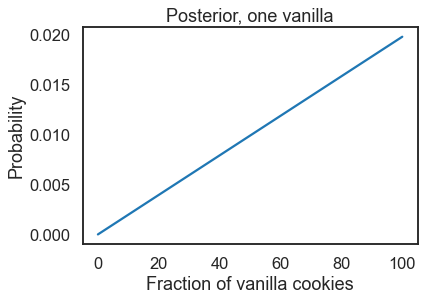

In [27]:
updated_df['posterior'].plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, one vanilla')

Suppose we put the first cookie back, stir the bowl, draw from the same bowl again, and get a vanilla cookie again.

What's are the posterior probabilities now?

We can do another update, using the posterior from the first draw as the prior for the second draw.

In [28]:
priors_index = list(range(101))
priors = updated_df['posterior']
vanilla_likelihood = priors_index

In [30]:
updated_df_1 = get_posterior(priors, priors_index, vanilla_likelihood)
updated_df_1

,priors,likelihood,unnormalized_posterior,prob_data,posterior
0,0.000000,0,0.000000,67.0,0.000000
1,0.000198,1,0.000198,67.0,0.000003
2,0.000396,2,0.000792,67.0,0.000012
3,0.000594,3,0.001782,67.0,0.000027
4,0.000792,4,0.003168,67.0,0.000047
...,...,...,...,...,...
96,0.019010,96,1.824950,67.0,0.027238
97,0.019208,97,1.863168,67.0,0.027808
98,0.019406,98,1.901782,67.0,0.028385
99,0.019604,99,1.940792,67.0,0.028967


Text(0.5, 1.0, 'Posterior, one vanilla')

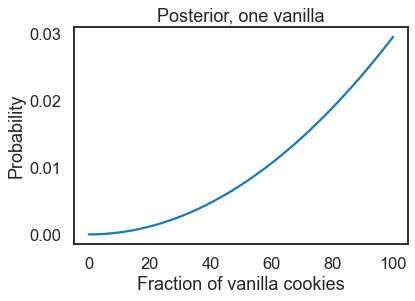

In [31]:
updated_df_1['posterior'].plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, one vanilla')

### Exercise 2

Suppose we put the second cookie back, stir the bowl, draw from the same bowl again, and get a chocolate cookie.

Now what are the posterior probabilities?


In [39]:
priors_index = list(range(101))
priors = updated_df_1['posterior']
vanilla_likelihood = priors_index
chocolate_likelihood = [100-van for van in vanilla_likelihood]

In [40]:
updated_df_2 = get_posterior(priors, priors_index, chocolate_likelihood)
updated_df_2

,priors,likelihood,unnormalized_posterior,prob_data,posterior
0,0.000000,100,0.000000,24.626866,0.000000
1,0.000003,99,0.000293,24.626866,0.000012
2,0.000012,98,0.001159,24.626866,0.000047
3,0.000027,97,0.002580,24.626866,0.000105
4,0.000047,96,0.004540,24.626866,0.000184
...,...,...,...,...,...
96,0.027238,4,0.108952,24.626866,0.004424
97,0.027808,3,0.083425,24.626866,0.003388
98,0.028385,2,0.056770,24.626866,0.002305
99,0.028967,1,0.028967,24.626866,0.001176


Text(0.5, 1.0, 'Posterior, for two vanilla and one chocolate')

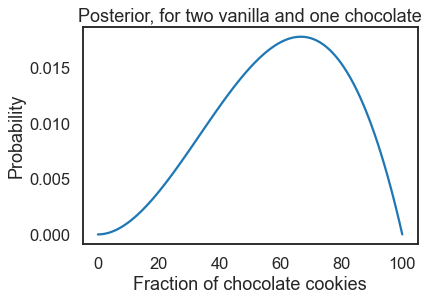

In [42]:
updated_df_2['posterior'].plot()

plt.xlabel('Fraction of chocolate cookies')
plt.ylabel('Probability')
plt.title('Posterior, for two vanilla and one chocolate')